# Submission 1 Analisis Sentimen
#### Angggun Caksono

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TQDM

tqdm digunakan untuk memberikan progress bar ketika melakukan operasi


In [2]:
%pip install tqdm

from tqdm import tqdm
tqdm.pandas()  # Integrasi tqdm dengan pandas

Note: you may need to restart the kernel to use updated packages.


# Load Dataset


In [3]:
url = 'brimo_reviews.csv'
df = pd.read_csv(url)

# Menampilkan dataframe sebagai tabel
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1202ed42-ac00-40ce-96de-7e0999717840,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap membantu banget,5,0,2.77.0,2025-01-31 08:03:47,"Hai, Sobat BRI. Terima kasih atas ulasannya. S...",2025-01-31 09:51:24,2.77.0
1,25c7c598-e5d5-4afa-a5fa-82b40399624e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,SAngat membantu transaksi keuangan,5,0,2.77.0,2025-01-31 07:59:30,"Hai, Sobat BRI. Terima kasih atas ulasannya. S...",2025-01-31 10:01:21,2.77.0
2,d57324e3-e261-4b6c-bee2-cb3b8ecc3388,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bermanfaat,5,0,2.77.0,2025-01-31 07:58:29,"Hai, Sobat BRI. Terima kasih atas ulasannya. S...",2025-01-31 10:01:08,2.77.0
3,8b85c65d-5570-4c8e-a9b4-96a6df5083d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aku kasih bitang 3 aja kadang notif keluar di ...,3,0,2.77.0,2025-01-31 07:57:15,"Hai, Sobat BRI. Mohon maaf atas kendala yang d...",2025-01-31 15:33:47,2.77.0
4,dc41ea0a-ba3c-4e1b-a26f-5c0ff30ebb2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat nyaman pakai aplikasi Brimo,5,0,2.73.0,2025-01-31 07:57:09,"Hai, Sobat BRI. Terima kasih atas ulasannya. S...",2025-01-31 09:52:02,2.73.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,6eb18fa0-7478-4c8a-9b2a-1b5bae1990ec,Agustin Claristha Yona,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,0,2.76.0,2025-01-07 13:05:36,"Hai, Sobat BRI. Terima kasih atas ulasannya. T...",2025-01-07 13:50:04,2.76.0
9996,956a5546-7911-4dcb-a29f-bb4d58f4cd6f,Fitria Ilato,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus,5,0,2.75.0,2025-01-07 13:04:39,"Hai, Sobat BRI. Terima kasih sudah menggunakan...",2025-01-07 13:42:53,2.75.0
9997,c3d34632-3576-4d23-9da3-580541e1cff8,Ahyani Ahyani,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus,4,0,2.76.0,2025-01-07 13:02:50,"Hai, Sobat BRI. Terima kasih atas ulasannya. T...",2025-01-07 13:47:59,2.76.0
9998,1399ff98-3753-4b21-abeb-1929e7d20b0c,Hari Chanel,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus,5,0,2.76.0,2025-01-07 13:00:05,"Hai, Sobat BRI. Terima kasih sudah menggunakan...",2025-01-07 13:43:08,2.76.0


In [4]:
# Menghitung dan menampilkan nilai NaN
missing_data = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_data)

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1840
at                         0
replyContent               4
repliedAt                  4
appVersion              1840
dtype: int64


In [5]:
# Tampilkan ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8160 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          9996 non-null   object
 9   repliedAt             9996 non-null   object
 10  appVersion            8160 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [6]:
# Hapus kolom pada DataFrame
df = df.drop(columns=['reviewId', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent',
                      'repliedAt', 'appVersion'])
print(df.columns)


Index(['userName', 'content', 'score', 'at'], dtype='object')


In [7]:
# Tampilkan Dataframe
df

,userName,content,score,at
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09
...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05


In [8]:
# Tampilkan ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
 3   at        10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [9]:
# Hitung jumlah score pada rating 1 - 5
df['score'].value_counts()

score
5    7492
1    1194
4     658
3     366
2     290
Name: count, dtype: int64

<Axes: title={'center': 'Persebaran Data Score'}, xlabel='score'>

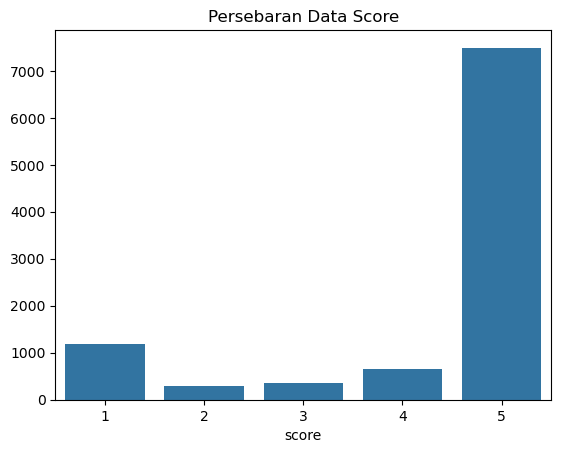

In [10]:
# Kelompokkan data berdasarkan kolom score
result = df.groupby(['score']).size()
plt.title('Persebaran Data Score')
sns.color_palette("viridis")
# plot the result
sns.barplot(x = result.index, y = result.values)

In [11]:
# Inisialisasi daftar sentimen
label_num = []

# Iterasi setiap baris dalam DataFrame
for index, row in df.iterrows():
    if row['score'] > 3 :
        label_num.append(1)     # nilai 1 untuk score 4 - 5 
    elif row['score'] == 3:
        label_num.append(0)     # nilai 0 untuk score 3
    else:
        label_num.append(-1)    # nilai -1 untuk score 1 - 2
        
# Tambahkan kolom baru         
df['label_num'] = label_num
df


,userName,content,score,at,label_num
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1
...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1


# Pelabelan

In [12]:
# Inisialisasi daftar label
label = []

# Iterasi setiap baris dalam DataFrame
for index, row in df.iterrows():
    if row['score'] > 3 :
        label.append("positive")     # nilai 1 untuk score 4 - 5 
    elif row['score'] == 3:
        label.append("neutral")     # nilai 0 untuk score 3
    else:
        label.append("negative")    # nilai -1 untuk score 1 - 2
        
# Tambahkan kolom baru         
df['label'] = label
df

,userName,content,score,at,label_num,label
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive
...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive


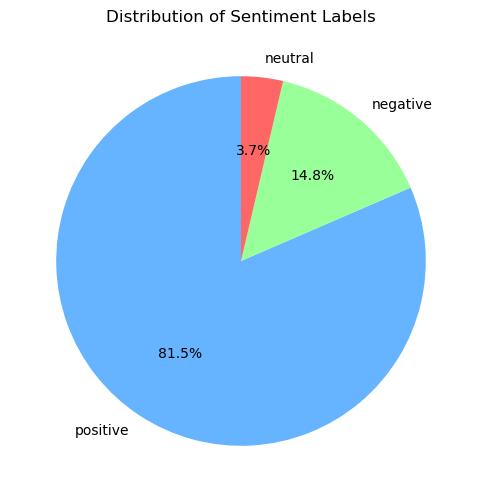

In [13]:
import matplotlib.pyplot as plt

# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Distribution of Sentiment Labels')
plt.show()

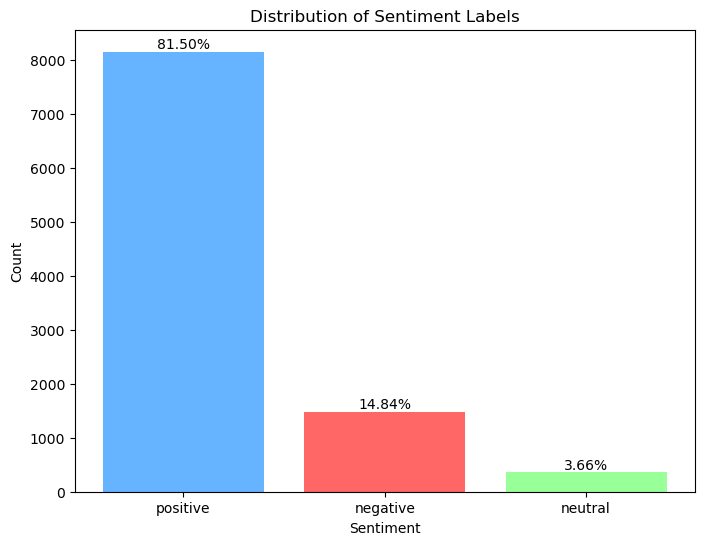

In [14]:
# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Hitung persentase untuk setiap kategori
label_percentages = label_counts / label_counts.sum() * 100

# Buat bar chart dan simpan dalam variabel `bars`
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#66b3ff', '#ff6666', '#99ff99'])

# Tambahkan persentase di atas setiap bar
for bar, percentage in zip(bars, label_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{percentage:.2f}%', 
        ha='center', 
        va='bottom'
    )

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

# NLTK

In [15]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import string
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/son/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/son/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/son/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocess Text

In [17]:
import pandas as pd
import re # modul re adalah regular expression 

def preprocess_text(text):
    # Menghapus URL
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE)
    
    # Mengubah teks jadi lower case
    text = text.lower()
    
    # Menghapus mention
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE)
    
    # Menghapus hashtag
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE)
    
    # Menghapus next karakter
    text = re.sub(r"'\w+", ' ', text)
    
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Menghapus extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Terapkan fungsi preprocess_text ke kolom 'content'
df['text_Clean'] = df['content'].progress_apply(preprocess_text)
df

100%|██████████| 10000/10000 [00:00<00:00, 112897.30it/s]


,userName,content,score,at,label_num,label,text_Clean
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral,aku kasih bitang 3 aja kadang notif keluar di ...
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive,sangat nyaman pakai aplikasi brimo
...,...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive,good
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive,bagus
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive,bagus
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive,bagus


In [19]:
# Membaca kamus slang dari file Excel
kamus_slang = pd.read_excel('kamuskatabaku.xlsx')

# Menyusun kamus slang sebagai dictionary: slang -> kata baku
slang_dict = dict(zip(kamus_slang['tidak_baku'], kamus_slang['kata_baku']))

# Fungsi untuk mengganti slang dengan kata baku
def ganti_slang(teks):
    return ' '.join([slang_dict.get(kata, kata) for kata in teks.split()])

In [20]:
# Menerapkan fungsi ganti_slang pada kolom 'text_StopWord'
df['text_Normalization'] = df['text_Clean'].progress_apply(ganti_slang)
df

100%|██████████| 10000/10000 [00:00<00:00, 406133.59it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget,mantap membantu banget
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan,sangat membantu transaksi keuangan
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat,bermanfaat
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral,aku kasih bitang 3 aja kadang notif keluar di ...,aku kasih bitang 3 saja kadang notif keluar di...
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive,sangat nyaman pakai aplikasi brimo,sangat nyaman pakai aplikasi brimo
...,...,...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive,good,good
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive,bagus,bagus
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive,bagus,bagus
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive,bagus,bagus


In [21]:
# Import pustaka nltk dari modul corpus
import nltk.corpus
nltk.download('stopwords') # download stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/son/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Hapus kata - kata umum
stop = stopwords.words('indonesian')
df['text_StopWord'] = df['text_Normalization'].progress_apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df

100%|██████████| 10000/10000 [00:00<00:00, 37318.59it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget,mantap membantu banget,mantap membantu banget
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan,sangat membantu transaksi keuangan,membantu transaksi keuangan
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat,bermanfaat,bermanfaat
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral,aku kasih bitang 3 aja kadang notif keluar di ...,aku kasih bitang 3 saja kadang notif keluar di...,kasih bitang 3 kadang notif
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive,sangat nyaman pakai aplikasi brimo,sangat nyaman pakai aplikasi brimo,nyaman pakai aplikasi brimo
...,...,...,...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive,good,good,good
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive,bagus,bagus,bagus
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive,bagus,bagus,bagus
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive,bagus,bagus,bagus


In [23]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
# Melakukan tokenize menggunakan Regexp
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['text_Tokenization']=df['text_StopWord'].progress_apply(regexp.tokenize)
df

100%|██████████| 10000/10000 [00:00<00:00, 152233.95it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget,mantap membantu banget,mantap membantu banget,"[mantap, membantu, banget]"
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan,sangat membantu transaksi keuangan,membantu transaksi keuangan,"[membantu, transaksi, keuangan]"
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat,bermanfaat,bermanfaat,[bermanfaat]
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral,aku kasih bitang 3 aja kadang notif keluar di ...,aku kasih bitang 3 saja kadang notif keluar di...,kasih bitang 3 kadang notif,"[kasih, bitang, 3, kadang, notif]"
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive,sangat nyaman pakai aplikasi brimo,sangat nyaman pakai aplikasi brimo,nyaman pakai aplikasi brimo,"[nyaman, pakai, aplikasi, brimo]"
...,...,...,...,...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive,good,good,good,[good]
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive,bagus,bagus,bagus,[bagus]
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive,bagus,bagus,bagus,[bagus]
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive,bagus,bagus,bagus,[bagus]


# Sastrawi


In [25]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [26]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [27]:
# Melakukan stemming dari tokens
df['text_Stemmindo'] = df['text_Tokenization'].progress_apply(lambda x: [stemmer.stem(y) for y in x])


100%|██████████| 10000/10000 [04:14<00:00, 39.22it/s]


In [28]:
# Tampilkan DataFrame
df

,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget,mantap membantu banget,mantap membantu banget,"[mantap, membantu, banget]","[mantap, bantu, banget]"
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan,sangat membantu transaksi keuangan,membantu transaksi keuangan,"[membantu, transaksi, keuangan]","[bantu, transaksi, uang]"
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat,bermanfaat,bermanfaat,[bermanfaat],[manfaat]
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral,aku kasih bitang 3 aja kadang notif keluar di ...,aku kasih bitang 3 saja kadang notif keluar di...,kasih bitang 3 kadang notif,"[kasih, bitang, 3, kadang, notif]","[kasih, bitang, 3, kadang, notif]"
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive,sangat nyaman pakai aplikasi brimo,sangat nyaman pakai aplikasi brimo,nyaman pakai aplikasi brimo,"[nyaman, pakai, aplikasi, brimo]","[nyaman, pakai, aplikasi, brimo]"
...,...,...,...,...,...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive,good,good,good,[good],[good]
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive,bagus,bagus,bagus,[bagus],[bagus]
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive,bagus,bagus,bagus,[bagus],[bagus]
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive,bagus,bagus,bagus,[bagus],[bagus]


In [29]:
# Melakukan string dari stemming
df['text_String'] = df['text_Stemmindo'].progress_apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df

100%|██████████| 10000/10000 [00:00<00:00, 219394.90it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo,text_String
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget,mantap membantu banget,mantap membantu banget,"[mantap, membantu, banget]","[mantap, bantu, banget]",mantap bantu banget
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan,sangat membantu transaksi keuangan,membantu transaksi keuangan,"[membantu, transaksi, keuangan]","[bantu, transaksi, uang]",bantu transaksi uang
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat,bermanfaat,bermanfaat,[bermanfaat],[manfaat],manfaat
3,Pengguna Google,Aku kasih bitang 3 aja kadang notif keluar di ...,3,2025-01-31 07:57:15,0,neutral,aku kasih bitang 3 aja kadang notif keluar di ...,aku kasih bitang 3 saja kadang notif keluar di...,kasih bitang 3 kadang notif,"[kasih, bitang, 3, kadang, notif]","[kasih, bitang, 3, kadang, notif]",kasih bitang kadang notif
4,Pengguna Google,Sangat nyaman pakai aplikasi Brimo,5,2025-01-31 07:57:09,1,positive,sangat nyaman pakai aplikasi brimo,sangat nyaman pakai aplikasi brimo,nyaman pakai aplikasi brimo,"[nyaman, pakai, aplikasi, brimo]","[nyaman, pakai, aplikasi, brimo]",nyaman pakai aplikasi brimo
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Agustin Claristha Yona,Good,5,2025-01-07 13:05:36,1,positive,good,good,good,[good],[good],good
9996,Fitria Ilato,Bagus,5,2025-01-07 13:04:39,1,positive,bagus,bagus,bagus,[bagus],[bagus],bagus
9997,Ahyani Ahyani,Bagus,4,2025-01-07 13:02:50,1,positive,bagus,bagus,bagus,[bagus],[bagus],bagus
9998,Hari Chanel,Bagus,5,2025-01-07 13:00:05,1,positive,bagus,bagus,bagus,[bagus],[bagus],bagus


In [30]:
# melihat informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userName            10000 non-null  object
 1   content             10000 non-null  object
 2   score               10000 non-null  int64 
 3   at                  10000 non-null  object
 4   label_num           10000 non-null  int64 
 5   label               10000 non-null  object
 6   text_Clean          10000 non-null  object
 7   text_Normalization  10000 non-null  object
 8   text_StopWord       10000 non-null  object
 9   text_Tokenization   10000 non-null  object
 10  text_Stemmindo      10000 non-null  object
 11  text_String         10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


In [31]:
# Simpan hasilnya
df.to_csv('hasil_Preprocessing_brimo.csv',index= False) #simpan hasil text preprocessing ke file csv

In [32]:
df = pd.read_csv('hasil_Preprocessing_brimo.csv')

In [33]:
# Tampilkan Text String
df['text_String']

0               mantap bantu banget
1              bantu transaksi uang
2                           manfaat
3         kasih bitang kadang notif
4       nyaman pakai aplikasi brimo
                   ...             
9995                           good
9996                          bagus
9997                          bagus
9998                          bagus
9999                    upgred buka
Name: text_String, Length: 10000, dtype: object

In [34]:
df.head(3)

,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo,text_String
0,Pengguna Google,Mantap membantu banget,5,2025-01-31 08:03:47,1,positive,mantap membantu banget,mantap membantu banget,mantap membantu banget,"['mantap', 'membantu', 'banget']","['mantap', 'bantu', 'banget']",mantap bantu banget
1,Pengguna Google,SAngat membantu transaksi keuangan,5,2025-01-31 07:59:30,1,positive,sangat membantu transaksi keuangan,sangat membantu transaksi keuangan,membantu transaksi keuangan,"['membantu', 'transaksi', 'keuangan']","['bantu', 'transaksi', 'uang']",bantu transaksi uang
2,Pengguna Google,Bermanfaat,5,2025-01-31 07:58:29,1,positive,bermanfaat,bermanfaat,bermanfaat,['bermanfaat'],['manfaat'],manfaat


# Modeling

# Import Libraries

In [35]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer

from tqdm import tqdm

from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings   

warnings.filterwarnings('ignore')
%matplotlib inline

# Separate X data and Y data

In [36]:
X = df['text_String']
y = df['label_num']

In [37]:
X

0               mantap bantu banget
1              bantu transaksi uang
2                           manfaat
3         kasih bitang kadang notif
4       nyaman pakai aplikasi brimo
                   ...             
9995                           good
9996                          bagus
9997                          bagus
9998                          bagus
9999                    upgred buka
Name: text_String, Length: 10000, dtype: object

In [38]:
y

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: label_num, Length: 10000, dtype: int64

# BiLSTM

In [112]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Fill NaN values with an empty string
df['text_String'] = df['text_String'].fillna('')

# Inisialisasi Tokenizer
tokenizer = Tokenizer()

# Tokenisasi teks
tokenizer.fit_on_texts(df['text_String'])

# Mengubah teks menjadi sequence
X_seq = tokenizer.texts_to_sequences(df['text_String'])

# Padding sequence
X_pad = pad_sequences(X_seq, maxlen=50)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=40)

# Inisialisasi model
model_bilstm = Sequential()



# Menambahkan layer Embedding
model_bilstm.add(Embedding(len(tokenizer.word_index)+1, 256))

# Menambahkan layer Bidirectional LSTM
model_bilstm.add(Bidirectional(LSTM(128, return_sequences=True)))
model_bilstm.add(Dropout(0.5))

model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.5))


# Menambahkan layer Dense
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compile model
model_bilstm.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Implementasi Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Latih model
history = model_bilstm.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stopping])

# Simpan model
model_bilstm.save('model_bilstm.h5')

# Evaluasi model
loss, accuracy_bilstm = model_bilstm.evaluate(X_test, y_test)
print('Loss:', loss)
# ubah accuracy menjadi persen
accuracy_bilstm = accuracy_bilstm * 100
print('Accuracy:', accuracy_bilstm)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.7012 - loss: 0.6737 - val_accuracy: 0.8075 - val_loss: 0.6392
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.8196 - loss: 0.6271 - val_accuracy: 0.8075 - val_loss: 0.6300
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - accuracy: 0.8148 - loss: 0.6235 - val_accuracy: 0.8075 - val_loss: 0.6244
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - accuracy: 0.8202 - loss: 0.6102 - val_accuracy: 0.8075 - val_loss: 0.6181


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8059 - loss: 0.6381
Loss: 0.639243483543396
Accuracy: 80.75000047683716


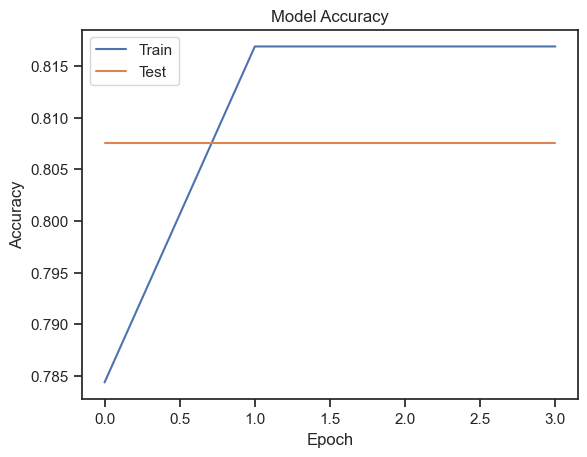

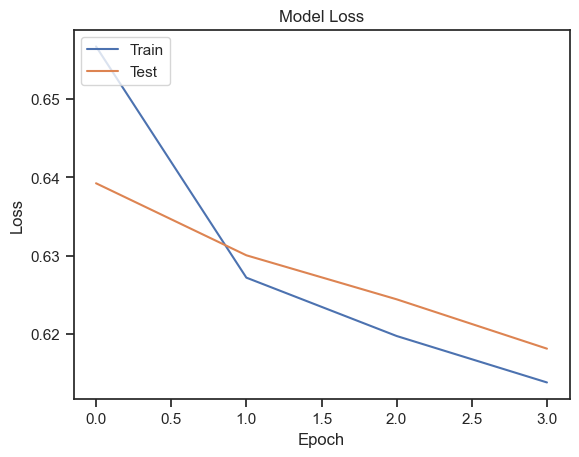

In [113]:
# menampilkan grafik akurasi dan loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
Confusion matrix:
 [[   0    0  305]
 [   0    0   80]
 [   0    0 1615]]


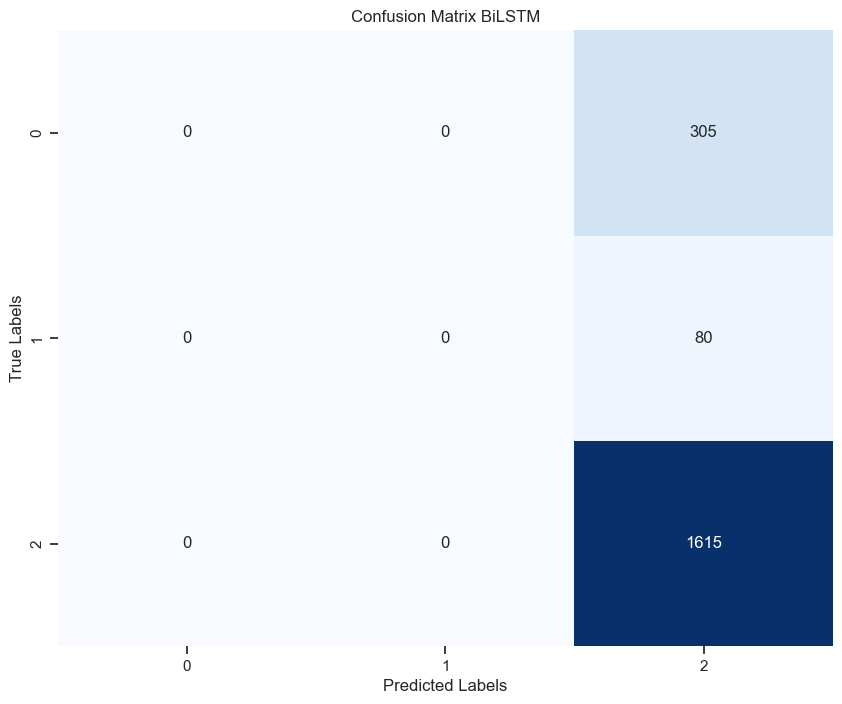

In [114]:
# confusion matrix BiLSTM
model_pred_bilstm_prob = model_bilstm.predict(X_test)
model_pred_bilstm = (model_pred_bilstm_prob > 0.5).astype("int32")
matrik_bilstm = confusion_matrix(y_test, model_pred_bilstm)
print('Confusion matrix:\n', matrik_bilstm)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_bilstm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix BiLSTM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# TF-IDF

Dipecah menjadi dua bagian TF (term frequency) dan IDF (inverse document frequency). 
TF (term frequency) yakni bekerja dengan melihat frekuensi istilah tertentu yang Anda perhatikan relatif terhadap dokumen. Kemudian apa itu IDF (inverse document frequency) ? IDF sendiri ialah Frekuensi dokumen terbalik melihat seberapa umum (atau tidak umum) sebuah kata di antara korpus. IDF dihitung sebagai berikut, di mana t adalah istilah (kata) yang ingin kita ukur keumumannya dan N adalah jumlah dokumen (d) dalam korpus (D). Penyebutnya hanyalah jumlah dokumen di mana istilah, t , muncul. 

In [43]:
# Inisialisasi dan fit TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan fit_transform pada kolom text_string
tfidf_matrix = tfidf_vectorizer.fit_transform(tqdm(df['text_String'], desc="Menghitung TF-IDF"))

# Mengambil daftar fitur (kata-kata)
terms = tfidf_vectorizer.get_feature_names_out()

# Menghitung IDF
idf = np.log(tfidf_matrix.shape[0] / (np.count_nonzero(tfidf_matrix.toarray(), axis=0) + 1))

# Membuat DataFrame untuk menyimpan term dan IDF
tfidf_df = pd.DataFrame({'term': terms, 'idf': idf})

# Tambahkan kolom TF (term frequency) untuk setiap dokumen
for i, doc in enumerate(tqdm(df['text_String'], desc="Menambahkan kolom TF")):
    tf = tfidf_matrix[i].toarray().flatten()
    tfidf_df[f'tf_{i}'] = tf

Menambahkan kolom TF: 100%|██████████| 10000/10000 [00:20<00:00, 496.97it/s]


In [44]:
tfidf_df

,term,idf,tf_0,tf_1,tf_2,tf_3,tf_4,tf_5,tf_6,tf_7,...,tf_9990,tf_9991,tf_9992,tf_9993,tf_9994,tf_9995,tf_9996,tf_9997,tf_9998,tf_9999
0,1000,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100000,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100k,7.824046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100rb,7.824046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100x,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,yupz,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3376,yutube,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3377,zaman,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3378,zonk,7.600902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from joblib import dump

# Simpan objek TfidfVectorizer yang telah di-fit
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [46]:
# Mengakses vocabulary
vocab = tfidf_vectorizer.vocabulary_

# Menampilkan vocabulary
print(vocab)

{'mantap': 1793, 'bantu': 392, 'banget': 378, 'transaksi': 3142, 'uang': 3215, 'manfaat': 1774, 'kasih': 1390, 'bitang': 531, 'kadang': 1353, 'notif': 2154, 'nyaman': 2175, 'pakai': 2250, 'aplikasi': 270, 'brimo': 582, 'keamanannja': 1407, 'moga': 2006, 'depan': 790, 'rekening': 2552, 'dormant': 885, 'tutup': 3212, 'bank': 388, 'dekat': 785, 'aktif': 148, 'online': 2214, 'biar': 492, 'ribet': 2595, 'bagus': 350, 'alhamdulillah': 178, 'mudah': 2029, 'login': 1691, 'user': 3285, 'name': 2070, 'paswordnya': 2291, 'terang': 3029, 'mohon': 2009, 'maaf': 1729, 'proses': 2467, 'tolong': 3121, 'dipeerbaiki': 842, 'sistem': 2825, 'bintang': 516, 'good': 1083, 'terimakasih': 3049, 'ganti': 1043, 'device': 807, 'muncul': 2040, 'kode': 1519, 'rule': 2619, 'arah': 296, 'sesuai': 2769, 'menggangu': 1913, 'sumpah': 2915, 'username': 3287, 'password': 2283, 'salah': 2642, 'masuk': 1835, 'muas': 2023, 'lebi': 1652, 'praktis': 2443, 'puasa': 2472, 'nthlah': 2165, 'pengin': 2337, 'update': 3260, 'tambah'

In [47]:
vocab

{'mantap': 1793,
 'bantu': 392,
 'banget': 378,
 'transaksi': 3142,
 'uang': 3215,
 'manfaat': 1774,
 'kasih': 1390,
 'bitang': 531,
 'kadang': 1353,
 'notif': 2154,
 'nyaman': 2175,
 'pakai': 2250,
 'aplikasi': 270,
 'brimo': 582,
 'keamanannja': 1407,
 'moga': 2006,
 'depan': 790,
 'rekening': 2552,
 'dormant': 885,
 'tutup': 3212,
 'bank': 388,
 'dekat': 785,
 'aktif': 148,
 'online': 2214,
 'biar': 492,
 'ribet': 2595,
 'bagus': 350,
 'alhamdulillah': 178,
 'mudah': 2029,
 'login': 1691,
 'user': 3285,
 'name': 2070,
 'paswordnya': 2291,
 'terang': 3029,
 'mohon': 2009,
 'maaf': 1729,
 'proses': 2467,
 'tolong': 3121,
 'dipeerbaiki': 842,
 'sistem': 2825,
 'bintang': 516,
 'good': 1083,
 'terimakasih': 3049,
 'ganti': 1043,
 'device': 807,
 'muncul': 2040,
 'kode': 1519,
 'rule': 2619,
 'arah': 296,
 'sesuai': 2769,
 'menggangu': 1913,
 'sumpah': 2915,
 'username': 3287,
 'password': 2283,
 'salah': 2642,
 'masuk': 1835,
 'muas': 2023,
 'lebi': 1652,
 'praktis': 2443,
 'puasa': 247

In [48]:
# Menampilkan beberapa entri pertama dari kosakata
for word, index in list(vocab.items())[:10]:
    print(f'Kata: {word}, Indeks: {index}')


Kata: mantap, Indeks: 1793
Kata: bantu, Indeks: 392
Kata: banget, Indeks: 378
Kata: transaksi, Indeks: 3142
Kata: uang, Indeks: 3215
Kata: manfaat, Indeks: 1774
Kata: kasih, Indeks: 1390
Kata: bitang, Indeks: 531
Kata: kadang, Indeks: 1353
Kata: notif, Indeks: 2154


# SMOTE to Handling Imbalanced

In [49]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik
tfidf_vectorizer = TfidfVectorizer()

# Fill NaN values with an empty string
X = X.fillna('')

X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi SMOTE
smote = SMOTE()

# Resampling dataset untuk menangani imbalanced data
X_sm, y_sm = smote.fit_resample(X_tfidf, y)

In [50]:
# print isi semua data
print(X_sm)


  (0, 1793)	0.5432344031861671
  (0, 392)	0.4716184887264128
  (0, 378)	0.6946023209624219
  (1, 392)	0.4456186016815737
  (1, 3142)	0.5127701071432027
  (1, 3215)	0.7338193776779867
  (2, 1774)	1.0
  (3, 1390)	0.3440233447012908
  (3, 531)	0.6885570815872153
  (3, 1353)	0.46015443033137055
  (3, 2154)	0.44248726980902575
  (4, 2175)	0.659896946962062
  (4, 2250)	0.5181546377464029
  (4, 270)	0.4081740054438135
  (4, 582)	0.3597857307509529
  (5, 3142)	0.26391168090482453
  (5, 1407)	0.7287637970134364
  (5, 2006)	0.3941838544347193
  (5, 790)	0.49383503495351255
  (6, 2552)	0.23701300413147497
  (6, 885)	0.38107751313066746
  (6, 3212)	0.3197519395152739
  (6, 388)	0.4121366357155483
  (6, 785)	0.3400569880141631
  (6, 148)	0.47859788818486926
  :	:
  (24447, 2143)	0.29776049322764264
  (24447, 142)	0.28507500711177947
  (24447, 140)	0.1776383963321233
  (24447, 2144)	0.1773037807539082
  (24447, 3194)	0.19966261119748832
  (24447, 994)	0.170455871044987
  (24447, 3260)	0.116139540952

# Split Dataset

In [51]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=40)

In [52]:
print(f"Jumlah X_train: {X_train.shape[0]}")
print(f"Jumlah X_test: {X_test.shape[0]}")
print(f"Jumlah y_train: {y_train.shape[0]}")
print(f"Jumlah y_test: {y_test.shape[0]}")


Jumlah X_train: 19560
Jumlah X_test: 4890
Jumlah y_train: 19560
Jumlah y_test: 4890


# Random Forest Classifier


In [53]:
algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

In [54]:
RandomForestClassifier()

RandomForestClassifier()

In [55]:
from joblib import dump # Digunakan untuk menyimpan model yang telah dilatih

# Simpan model hasil traning
dump(model, filename='model_rf.joblib')

['model_rf.joblib']

In [56]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([ 1,  0, -1, ..., -1, -1, -1])

In [57]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

4039     1
23545    0
12908   -1
10957   -1
9888     1
        ..
14907   -1
22576    0
7685     1
4066     1
15550   -1
Name: label_num, Length: 4890, dtype: int64

# Confusion Matrix

In [58]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy_rf = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy_rf, '%')

Jumlah prediksi benar	: 4473
Jumlah prediksi salah	: 417
Akurasi pengujian	: 91.47239263803681 %


In [59]:
matrik = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', matrik)

Confusion matrix:
 [[1555   54   56]
 [  28 1502   92]
 [ 136   51 1416]]


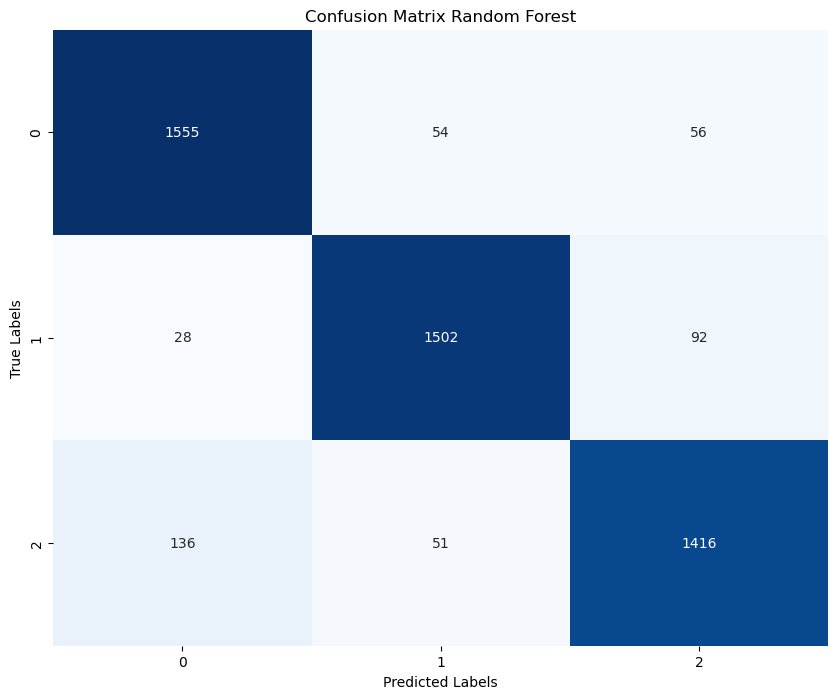

In [60]:
# Misalkan y_test adalah label sebenarnya dan model_pred adalah prediksi model
matrik = confusion_matrix(y_test, model_pred)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report

In [61]:
print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

          -1       0.90      0.93      0.92      1665
           0       0.93      0.93      0.93      1622
           1       0.91      0.88      0.89      1603

    accuracy                           0.91      4890
   macro avg       0.91      0.91      0.91      4890
weighted avg       0.91      0.91      0.91      4890



In [91]:
# random forest dengan pembagian data 85% training dan 15% testing
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.15,random_state=2)

print(f"Jumlah X_train: {X_train.shape[0]}")
print(f"Jumlah X_test: {X_test.shape[0]}")
print(f"Jumlah y_train: {y_train.shape[0]}")
print(f"Jumlah y_test: {y_test.shape[0]}")

algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

RandomForestClassifier()

from joblib import dump # Digunakan untuk menyimpan model yang telah dilatih

# Simpan model hasil traning
dump(model, filename='model_rf1.joblib')

# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

# Tampilkan label sebenarnya pada data uji (actual label)
y_test

# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy_rf1 = prediksi_benar / (prediksi_benar + prediksi_salah)*100
accuracy_rf1 = round(accuracy_rf1, 0)
print('Akurasi pengujian\t:', accuracy_rf1, '%')




Jumlah X_train: 20782
Jumlah X_test: 3668
Jumlah y_train: 20782
Jumlah y_test: 3668
Jumlah prediksi benar	: 3366
Jumlah prediksi salah	: 302
Akurasi pengujian	: 92.0 %


# SVM

In [63]:
# menggunakan SVM
from sklearn.svm import SVC

# Inisialisasi model
model_svm = SVC()

# Latih model
model_svm.fit(X_train, y_train)

# Simpan model
dump(model_svm, filename='model_svm.joblib')



['model_svm.joblib']

In [64]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji

model_pred_svm = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_svm



array([ 0, -1,  1, ..., -1,  0,  0])

In [65]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm = (model_pred_svm == y_test).sum()
prediksi_salah_svm = (model_pred_svm != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm)
print('Jumlah prediksi salah\t:', prediksi_salah_svm)

accuracy_svm = prediksi_benar_svm / (prediksi_benar_svm + prediksi_salah_svm)*100
print('Akurasi pengujian\t:', accuracy_svm, '%')



Jumlah prediksi benar	: 5242
Jumlah prediksi salah	: 871
Akurasi pengujian	: 85.75167675445772 %


Confusion matrix:
 [[1619  386   54]
 [  37 1944   66]
 [  98  230 1679]]


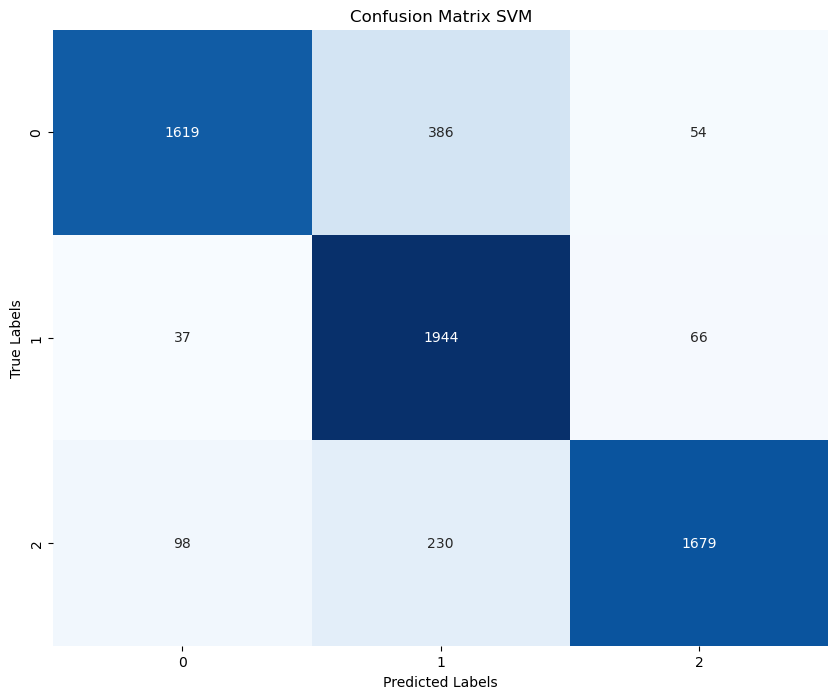

Classification report:
               precision    recall  f1-score   support

          -1       0.92      0.79      0.85      2059
           0       0.76      0.95      0.84      2047
           1       0.93      0.84      0.88      2007

    accuracy                           0.86      6113
   macro avg       0.87      0.86      0.86      6113
weighted avg       0.87      0.86      0.86      6113



In [66]:
# confusion matrix SVM
matrik_svm = confusion_matrix(y_test, model_pred_svm)
print('Confusion matrix:\n', matrik_svm)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred_svm))



# Decision Tree

In [67]:
# Menggunakan Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
model_dt = DecisionTreeClassifier()

# Latih model
model_dt.fit(X_train, y_train)

# Simpan model
dump(model_dt, filename='model_dt.joblib')

# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred_dt = model_dt.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_dt

# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_dt = (model_pred_dt == y_test).sum()
prediksi_salah_dt = (model_pred_dt != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_dt)
print('Jumlah prediksi salah\t:', prediksi_salah_dt)

accuracy_dt = prediksi_benar_dt / (prediksi_benar_dt + prediksi_salah_dt)*100
print('Akurasi pengujian\t:', accuracy_dt, '%')




Jumlah prediksi benar	: 5435
Jumlah prediksi salah	: 678
Akurasi pengujian	: 88.90888270898087 %


Confusion matrix:
 [[1801  121  137]
 [  62 1851  134]
 [ 140   84 1783]]


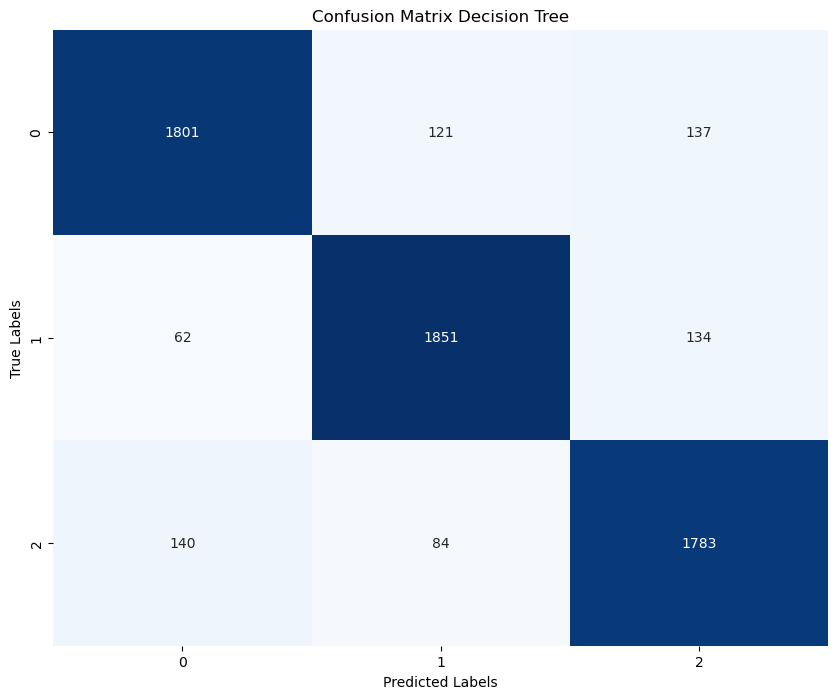

Classification report:
               precision    recall  f1-score   support

          -1       0.90      0.87      0.89      2059
           0       0.90      0.90      0.90      2047
           1       0.87      0.89      0.88      2007

    accuracy                           0.89      6113
   macro avg       0.89      0.89      0.89      6113
weighted avg       0.89      0.89      0.89      6113



In [68]:
# confusion matrix Decision Tree
matrik_dt = confusion_matrix(y_test, model_pred_dt)
print('Confusion matrix:\n', matrik_dt)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred_dt))



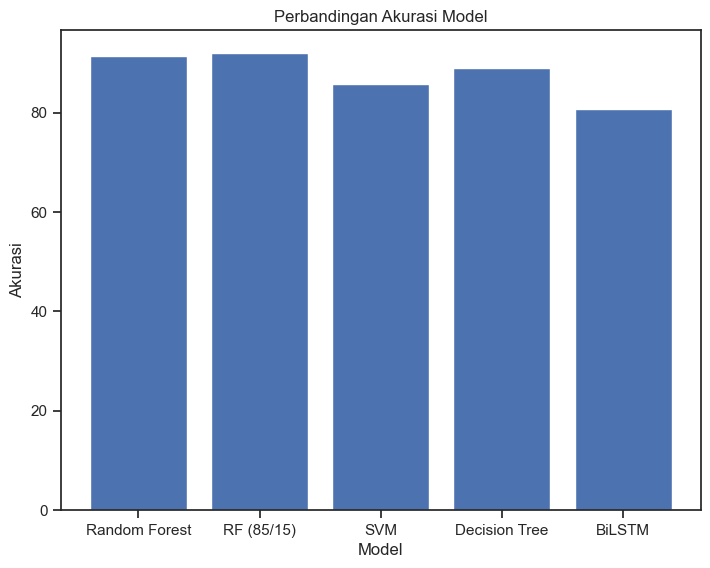

In [92]:
# grafik perbandingan akurasi
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Random Forest', 'RF (85/15)', 'SVM', 'Decision Tree', 'BiLSTM']
accuracy = [accuracy_rf, accuracy_rf1, accuracy_svm, accuracy_dt, accuracy_bilstm]
ax.bar(model, accuracy)
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()


In [93]:
# print hasil akurasi dari masing-masing model dalam bentuk dataframe
df_accuracy = pd.DataFrame({'Model': ['Random Forest  (85/15)', 'Random Forest', 'SVM', 'Decision Tree', 'BiLSTM'],
                             'Accuracy': [accuracy_rf1, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_bilstm]})
df_accuracy


,Model,Accuracy
0,Random Forest (85/15),92.000000
1,Random Forest,91.472393
2,SVM,85.751677
3,Decision Tree,88.908883
4,BiLSTM,80.750000


# Test Model

#### Melakukan inference atau testing yang menghasilkan output berupa kelas kategorikal (contoh: negatif, netral, dan positif).

In [71]:
from joblib import load
from sklearn.feature_extraction.text import TfidfVectorizer

# Muat model yang telah disimpan
model = load('model_rf.joblib')

# Muat TF-IDF Vectorizer yang telah disimpan
vectorizer = load('tfidf_vectorizer.joblib')

# Tetapkan input teks secara manual
test_input = "Brimo sangat membantu saya dalam melakukan transaksi"

# Preprocess text
test_input_preprocessed = preprocess_text(test_input)

# Tampilkan hasil preprocessing
print(f'Teks setelah preprocessing: {test_input_preprocessed}')

# Transformasi input teks yang telah dipreprocessing menjadi fitur
test_input_transformed = vectorizer.transform([test_input_preprocessed])

# Buat prediksi
prediksi = model.predict(test_input_transformed)

# Ambil hasil prediksi
hasil_prediksi = prediksi[0]

# Map hasil prediksi ke label sentimen menggunakan if-else
if hasil_prediksi == -1:
    sentimen = 'Negatif'
elif hasil_prediksi == 0:
    sentimen = 'Netral'
elif hasil_prediksi == 1:
    sentimen = 'Positif'
else:
    sentimen = 'Label tidak dikenali'

# Cetak hasil sentimen
print(f'Hasil prediksi: {sentimen}')


Teks setelah preprocessing: brimo sangat membantu saya dalam melakukan transaksi
Hasil prediksi: Negatif


In [72]:
# Simpan hasil ke file
with open('hasil_prediksi.txt', 'w') as file:
    file.write(f'Teks asli: {test_input}\n')
    file.write(f'Teks setelah preprocessing: {test_input_preprocessed}\n')
    file.write(f'Hasil sentimen: {sentimen}\n')

# Install WordCloud

Teknik untuk melakukan visualisasi pada DataFrame

In [73]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [74]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [75]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2025-02-01 08:19:56--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.1’

cloud.jpg.1         100%[===================>]  33.59K  --.-KB/s    in 0.02s   

2025-02-01 08:19:57 (1.48 MB/s) - ‘cloud.jpg.1’ saved [34396/34396]



In [76]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

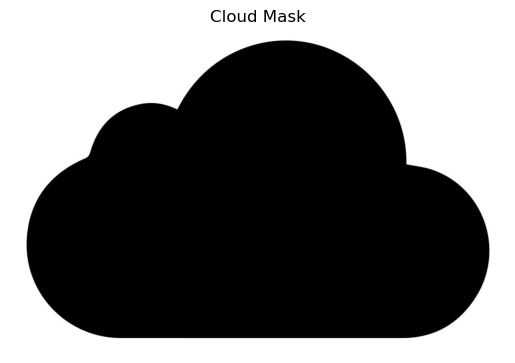

In [77]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
cloud_mask = cv2.imread('cloud.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if cloud_mask is None:
    print("Error: Image not loaded correctly.")
else:
    # Display the mask using matplotlib
    plt.imshow(cloud_mask, cmap='gray')
    plt.title('Cloud Mask')
    plt.axis('off')  # Optional, to hide the axes
    plt.show()

# WordCloud for Positive Sentiment

In [78]:
df_p=df[df['label_num']==1]

all_words_lem = ' '.join([word for word in df_p['text_String']])

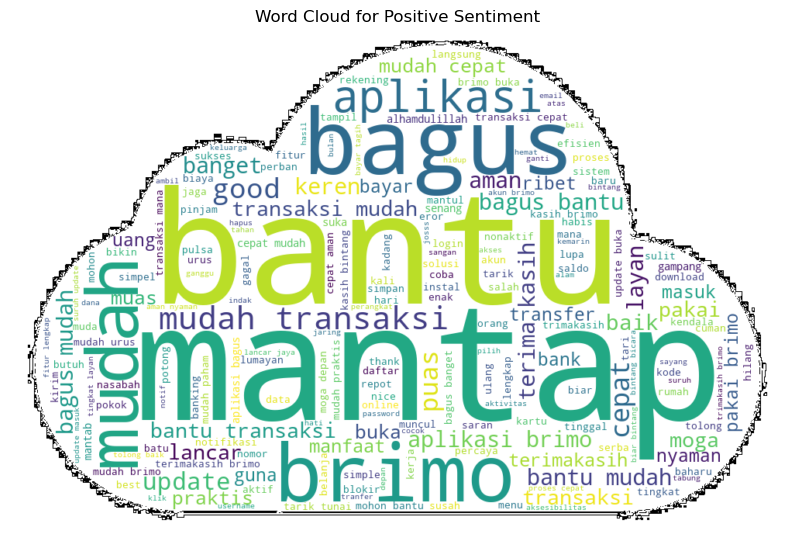

In [79]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# WordCloud for Neutral Sentiment

In [80]:
# Filter data frame untuk sentiment netral
df_n = df[df['label_num'] == 0]

# Gabungkan semua kata dalam kolom 'text_string' yang memiliki sentimen netral
all_words_lem = ' '.join([word for word in df_n['text_String']])

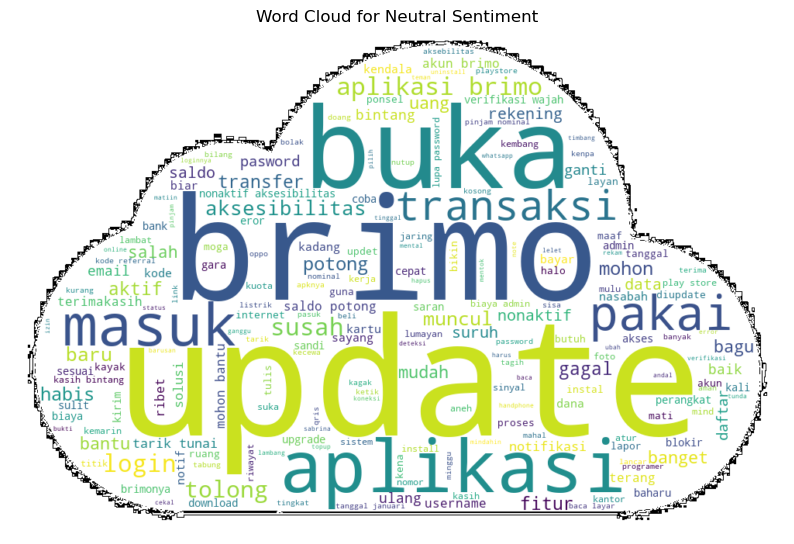

In [81]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# WordCloud for Negative Sentiment

In [82]:
# Filter data frame untuk sentiment negatif
df_n = df[df['label_num'] == -1]

# Gabungkan semua kata dalam kolom 'text_string' yang memiliki sentimen negatif
all_words_lem = ' '.join([word for word in df_n['text_String']])

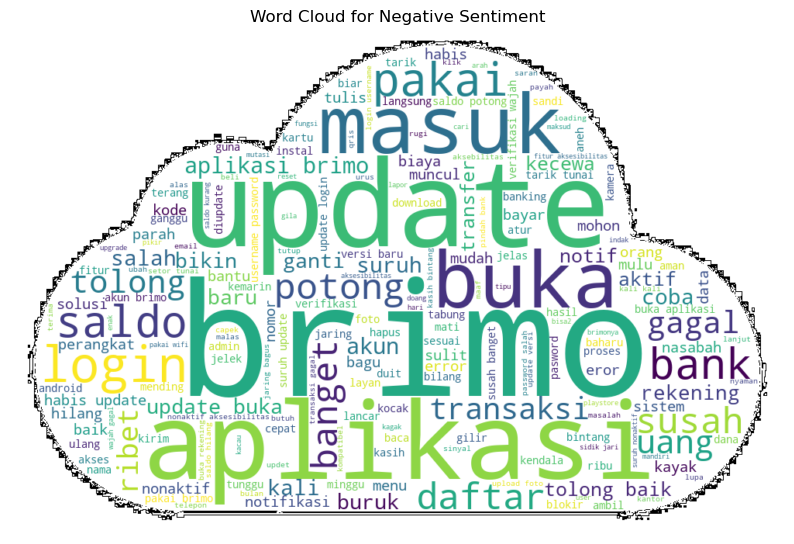

In [83]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# Words That Appear The Most

In [84]:
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

[nltk_data] Downloading package punkt to /home/son/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
fd.most_common(3)

[('update', 449), ('brimo', 435), ('aplikasi', 346)]

In [86]:
fd.tabulate(3)

  update    brimo aplikasi 
     449      435      346 


In [87]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

<Axes: title={'center': '10 kata paling sering muncul'}, ylabel='None'>

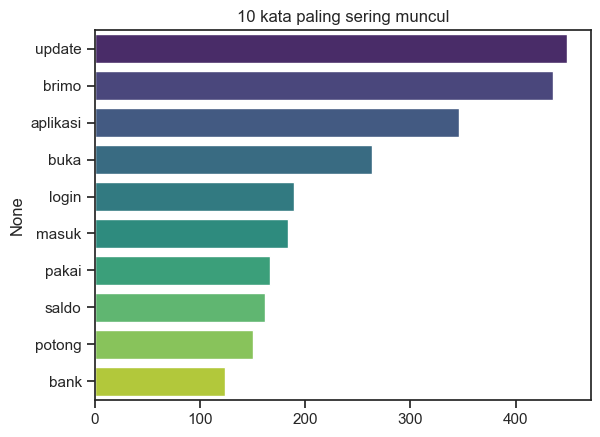

In [88]:
sns.set_theme(style="ticks")

# title
plt.title('10 kata paling sering muncul')

# Create barplot
sns.barplot(y=fdist.index, x=fdist.values, palette='viridis')